# Import Libraries

In [4]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.datasets import (
    make_blobs,
    load_iris
)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

from knn import KNNClassifier

# Dataset creation

In [2]:
# dataset creation
X, y = make_blobs(n_samples = 300,
                  n_features = 2,
                  center_box = (-0.4,0.4),
                  cluster_std = 0.15,
                  random_state = 42)

In [3]:
# Load iris dataset
iris_x, iris_y = load_iris(return_X_y=True)

In [78]:
columns = ["outlook","temperature","humidity","wind","play_tennis"]

data = [
    ["Sunny","Hot","High","Weak","No"],
    ["Sunny","Hot","High","Strong","No"],
    ["Overcast","Hot","High","Weak","Yes"],
    ["Rain","Mild","High","Weak","Yes"],
    ["Rain","Cool","Normal","Weak","Yes"],
    ["Rain","Cool","Normal","Strong","No"],
    ["Overcast","Cool","Normal","Strong","Yes"],
    ["Sunny","Mild","High","Weak","No"],
    ["Sunny","Cool","Normal","Weak","Yes"],
    ["Rain","Mild","Normal","Weak","Yes"],
    ["Sunny","Mild","Normal","Strong","Yes"],
    ["Overcast","Mild","High","Strong","Yes"],
    ["Overcast","Hot","Normal","Weak","Yes"],
    ["Rain","Mild","High","Strong","No"],
]

play_tennis = pd.DataFrame(data,columns=columns)
play_tennis

,outlook,temperature,humidity,wind,play_tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Vanilla KNN - from scratch

In [4]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

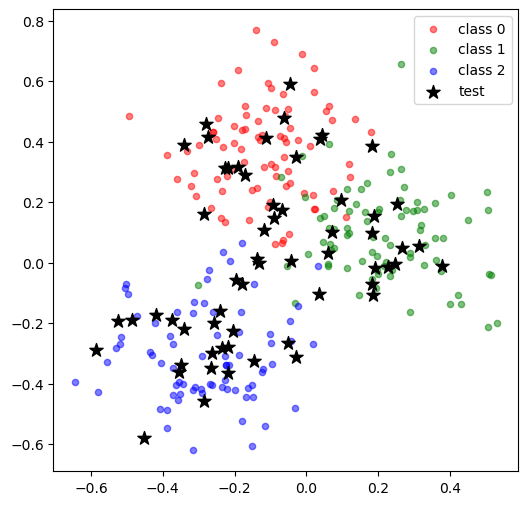

In [5]:
# visualize data
plt.figure(figsize=(6,6))
for category, color in enumerate(["red","green","blue"]):
    mask = y_train==category
    points = X_train[mask]
    plt.scatter(points[:,0], 
                points[:,1], 
                c = color, 
                s = 20, 
                label = "class " + str(category), 
                alpha = 0.5)

plt.scatter(X_test[:, 0], 
            X_test[:, 1], 
            c = "black",
            s = 100,
            marker = "*",
            label = "test")

plt.legend()
plt.show()

In [6]:
# Calculate the mean and standard deviation from training data and apply them to test data
mean = X_train.mean()
std = X_train.std()
z_train = (X_train - mean) / std
z_test = (X_test - mean) / std

In [7]:
# Measure Accuracy of the test data while changing K
accuracy = []
k_vals = np.arange(1,X_train.shape[0]+1,3)
for k in k_vals:
    # Predictions
    y_pred =  KNNClassifier(K=k,weights='uniform').predict(z_train,z_test,y_train)
    accuracy.append((y_pred == y_test).mean())

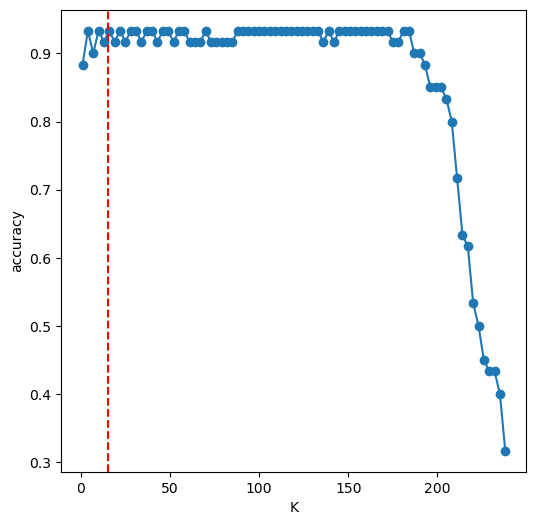

In [8]:
# Effects of K on accuracy
plt.figure(figsize=(6,6))
plt.plot(k_vals, accuracy, 'o-')
plt.axvline(x=np.sqrt(X_train.shape[0]), c='r', ls='--')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.show()

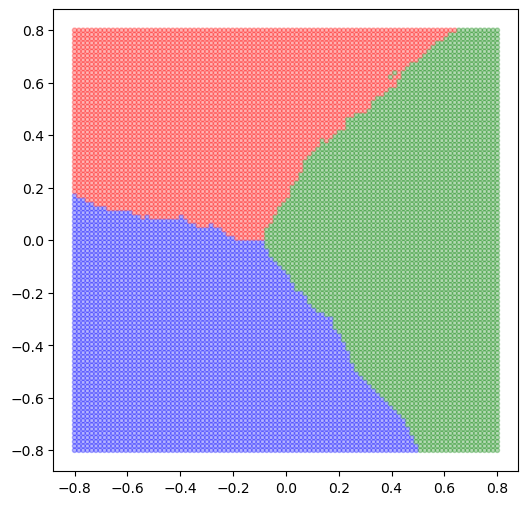

In [9]:
# Visualize decision boundary
x = np.linspace(-0.8,0.8,100)
y = np.linspace(-0.8,0.8,100)
xx, yy = np.meshgrid(x,y)
test_many = np.hstack((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)))
z_many = (test_many - mean)/ std
y_many = KNNClassifier(K=int(np.sqrt(X_train.shape[0])),weights='uniform').predict(z_train,z_many,y_train)

plt.figure(figsize=(6,6))
color = [["red","green","blue"][p] for p in y_many]
plt.scatter(test_many[:,0], test_many[:,1], s=10, c=color, alpha=0.3)
plt.show()

# Vanilla KNN - sklearn

In [10]:
# Create train, validation and test splits
X_, iris_x_test, y_, iris_y_test = train_test_split(iris_x, iris_y, test_size=0.2, random_state=42)
iris_x_train, iris_x_val, iris_y_train, iris_y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [11]:
# Normalize Data (Z-score Normalization)

iris_mean = iris_x_train.mean()
iris_std = iris_x_train.std()

iris_x_train = (iris_x_train - iris_mean) / iris_std
iris_x_val = (iris_x_val - iris_mean) / iris_std
iris_x_test = (iris_x_test - iris_mean) / iris_std

In [12]:
# set K
k = int(np.sqrt(iris_x_train.shape[0]))

In [13]:
# Build KNN model
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

In [14]:
knn.fit(iris_x_train, iris_y_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
y_pred_val = knn.predict(iris_x_val) # Estimate the class for validation data

In [16]:
# Measure accuracy for validation data
accuracy =(y_pred_val == iris_y_val).mean()
print(f"With K = {k}, Accuracy for validation data = {accuracy:.3f}")

With K = 9, Accuracy for validation data = 0.917


In [17]:
# Determine optimal k using the validation set.
accuracy = []
k_vals = np.arange(1,iris_x_train.shape[0]+1)
for k in k_vals:
    # Predictions
    y_pred =  (
        KNeighborsClassifier(n_neighbors=k)
        .fit(iris_x_train,iris_y_train)
        .predict(iris_x_val)
    )
    accuracy.append((y_pred == iris_y_val).mean())

In [18]:
# find optimal k
optimal_k = np.array(accuracy).argmax()+1
optimal_k

28

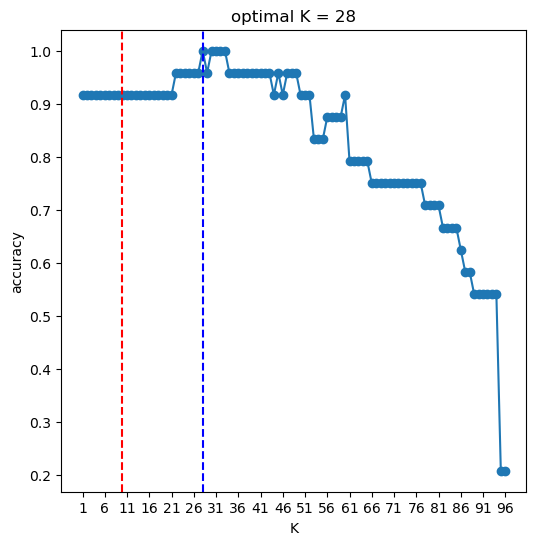

In [19]:
plt.figure(figsize=(6,6))
plt.plot(k_vals, accuracy, 'o-')
plt.xticks(np.arange(1,iris_x_train.shape[0]+1,5))
plt.axvline(x=np.sqrt(iris_x_train.shape[0]), c='r', ls='--')
plt.axvline(x=optimal_k, c='b', ls='--')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title(f"optimal K = {optimal_k}")
plt.show()

In [20]:
# Measure final performace on test data
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(iris_x_train,iris_y_train)
y_pred_test = knn.predict(iris_x_test)
# Measure accuracy for validation data
accuracy =(y_pred_test == iris_y_test).mean()
print(f"With K = {optimal_k}, Accuracy for validation data = {accuracy:.3f}")

With K = 28, Accuracy for validation data = 1.000


# Weighted KNN - from scratch vs sklearn

In [21]:
# create training and test data
x_train, x_test, y_train, y_test = train_test_split(iris_x,iris_y)

In [22]:
# Normalize Data (Z-score Normalization)
mean = x_train.mean()
std = x_train.std()

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [23]:
knn_weighted = KNNClassifier(weights='distance')

In [24]:
y_pred1 = knn_weighted.predict(x_train,x_test,y_train)

In [25]:
clf = KNeighborsClassifier(n_neighbors=int(np.sqrt(x_train.shape[0])), weights='distance')

In [26]:
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [27]:
y_pred2 = knn.predict(x_test)

In [28]:
accuracy1 = (y_pred1 == y_test).mean()
accuracy2 = (y_pred2 == y_test).mean()

In [29]:
print(f"Accuracy of test data = {accuracy1:.3f}\nAccuracy of test data (sklearn) = {accuracy2:.3f}")

Accuracy of test data = 0.974
Accuracy of test data (sklearn) = 0.974


# KNN Classification using IOF Distance

In [79]:
# One-hot encoding

ohe = OneHotEncoder(sparse_output=False, dtype=int).set_output(transform='pandas')

ohe.fit(play_tennis)

play_tennis_ohe = ohe.transform(play_tennis)

In [80]:
x = play_tennis_ohe.iloc[:,:-2]
y = play_tennis_ohe.iloc[:,-1]

In [144]:
# Create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=4)

In [145]:
x_train

,outlook_Overcast,outlook_Rain,outlook_Sunny,temperature_Cool,temperature_Hot,temperature_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
13,0,1,0,0,0,1,1,0,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,1,0
10,0,0,1,0,0,1,0,1,1,0
0,0,0,1,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
12,1,0,0,0,1,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0


In [146]:
# Generate frequency table fpr each category
q = np.array([np.bincount(x_train[col]) for col in x_train])
q_table = q.T

In [147]:
q_table

array([[8, 6, 6, 6, 8, 6, 6, 4, 6, 4],
       [2, 4, 4, 4, 2, 4, 4, 6, 4, 6]])

In [148]:
'''
q_table:
    i:  0  1  2  3  4  5  6  7  8  9
ohe=0: [9, 8, 7, 8, 8, 8, 6, 6, 7, 5],
ohe=1: [3, 4, 5, 4, 4, 4, 6, 6, 5, 7]
'''

'\nq_table:\n    i:  0  1  2  3  4  5  6  7  8  9\nohe=0: [9, 8, 7, 8, 8, 8, 6, 6, 7, 5],\nohe=1: [3, 4, 5, 4, 4, 4, 6, 6, 5, 7]\n'

In [149]:
# Calculate the IOF distance between source and target vector
def iof_distance(s,t):
    sim = np.ones(shape=(s.shape[0],))

    for i in range(s.shape[0]):
        if s[i] != t[i]:
            log_x = np.log(q_table[s[i],i] + 1e-8)
            log_y = np.log(q_table[t[i],i] + 1e-8)
            sim[i] = (1./(1.+log_x*log_y))
    return (1./np.mean(sim))-1. 

In [150]:
# Calculate the IOF distance between x_test and x_train
dist = np.array([iof_distance(s,t) for s in x_test.values \
                                   for t in x_train.values])

dist = dist.reshape(x_test.shape[0],-1)

In [151]:
# Select K data with small distance and find the majority of the target class
K = 5
i_near = np.argsort(dist)[:,:K]
y_near = y_train.values[i_near]
y_pred = np.array([np.bincount(p).argmax() for p in y_near])

In [152]:
print('true class (y_test):', y_test.values)
print('predicted class (y_pred):', y_pred)

true class (y_test): [1 1 0 1]
predicted class (y_pred): [1 1 0 0]
